In [15]:
#Importing tensorflow 
import tensorflow as tf
from tensorflow import keras

In [2]:
#Importing MNIST Dataset

mnist = tf.keras.datasets.mnist  # 28x28 images of handwritten digits from 0-9
(x_train,y_train), (x_test,y_test) = mnist.load_data() #seperating the training and testing data

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
print ("Initial shape & Dimension of x_train:", str(x_train.shape))
print ("Number of samples in our training data:", str(len(x_train)))
print ("Number of lables in our training data:", str(len(x_test)))

Initial shape & Dimension of x_train: (60000, 28, 28)
Number of samples in our training data: 60000
Number of lables in our training data: 10000


In [5]:
print("Number of samples in test data:"+ str(len(x_test)))
print("Number of labels in the test data:"+str(len(y_test)))

Number of samples in test data:10000
Number of labels in the test data:10000


In [6]:
#Checking images using openCV

import cv2
import numpy as np
for i in range(0,6):
 random_num = np.random.randint(0, len(x_train))
 img = x_train[random_num]
 window_name = 'Random Sample #' +str(i)
 cv2.imshow(window_name, img)
 cv2.waitKey()
cv2.destroyAllWindows()

# Note : A new window will open you can see the images and press tab for multiple times 

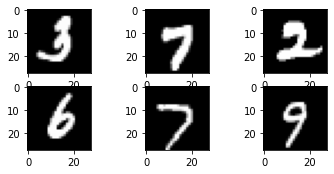

In [7]:
#Checking images using matplotlib
import matplotlib.pyplot as plt
plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(337)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(338)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(339)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
x_train /=255
x_test /=255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print ("Number of classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

y_train[0]

Number of classes: 10


Using TensorFlow backend.


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
# Training the models 

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(10, kernel_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
# Compiling the model 
model.compile(loss ="categorical_crossentropy", optimizer= keras.optimizers.Adam(0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False), metrics = ['accuracy'])

In [17]:
#Training the model
model.fit(x_train,y_train,epochs = 5)


Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 109s 2ms/sample - loss: 0.2087 - acc: 0.9364
Epoch 2/5
46048/60000 [======================>.......] - ETA: 28s - loss: 0.0886 - acc: 0.9734

KeyboardInterrupt: 

In [18]:
batch_size = 32
epochs = 6

history = model.fit(x_train,
                    y_train,
                    batch_size= batch_size,
                    epochs = epochs,
                    verbose=1, 
                    validation_data= (x_test, y_test))



score = model.evaluate(x_test, y_test, verbose=0)
print('Test_loss:', score[0])
print('Test_accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.0719 - acc: 0.9782 - val_loss: 0.0433 - val_acc: 0.9861
Epoch 2/6
60000/60000 [==============================] - 155s 3ms/sample - loss: 0.0558 - acc: 0.9825 - val_loss: 0.0333 - val_acc: 0.9885
Epoch 3/6
60000/60000 [==============================] - 158s 3ms/sample - loss: 0.0442 - acc: 0.9863 - val_loss: 0.0336 - val_acc: 0.9894
Epoch 4/6
60000/60000 [==============================] - 162s 3ms/sample - loss: 0.0392 - acc: 0.9880 - val_loss: 0.0345 - val_acc: 0.9891
Epoch 5/6
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.0362 - acc: 0.9889 - val_loss: 0.0297 - val_acc: 0.9911
Epoch 6/6
60000/60000 [==============================] - 160s 3ms/sample - loss: 0.0309 - acc: 0.9897 - val_loss: 0.0319 - val_acc: 0.9914
Test_loss: 0.031853952001559674
Test_accuracy: 0.9914


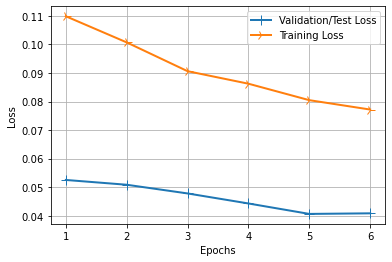

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

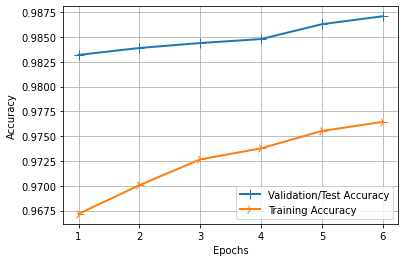

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 977,    0,    0,    0,    0,    0,    0,    1,    2,    0],
       [   0, 1125,    3,    2,    0,    0,    2,    0,    3,    0],
       [   2,    2, 1023,    0,    1,    0,    0,    4,    0,    0],
       [   0,    0,    4,  997,    0,    4,    0,    2,    2,    1],
       [   0,    0,    1,    0,  973,    0,    2,    0,    1,    5],
       [   2,    0,    0,    4,    0,  881,    2,    1,    1,    1],
       [   8,    2,    0,    0,    2,    1,  942,    0,    3,    0],
       [   1,    1,    9,    1,    0,    0,    0, 1013,    1,    2],
       [   8,    1,    2,    1,    1,    0,    1,    2,  955,    3],
       [   4,    4,    0,    3,    6,    0,    0,    5,    2,  985]],
      dtype=int64)

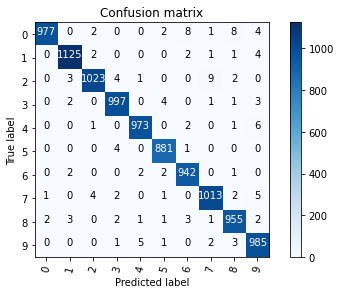

In [20]:
# Confussion matrix 
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(10)
cm = confusion_matrix(y_pred,y_test)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [21]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

